In [58]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
from matplotlib import pyplot as plt
import requests, json
import numpy as np
import sys
import os
sys.path.append( 'C:/Users/Tami/Desktop/lab/ipynb_from_others/archive_repos/Pete_heatmap/' )
import metatlas
import re
import csv
from itertools import groupby
#from clustergram import *
import pandas as pd
from scipy.spatial.distance import pdist, squareform, cdist

In [59]:
def selectranges(infosheet,infomsg):

    print infosheet
    minrnge=str(0)
    maxrnge=str(len(infosheet)-1)
    default=minrnge+':'+maxrnge

    a=raw_input(infomsg) or default
    b=a.split(',')
    #b=list(b)
    range2=[]
    range1=[]
    for i,x in enumerate(b):
        c=b[i].split(':')
        min1=int(c[0])
        
        try:
            max1=int(c[1])
        except:
            max1=int(c[0])
        
        range1=range(min1,(max1+1))
        range2=range2+range1
    
    return range2

In [60]:
def meanorind(dataset,infolist):
    inputselect=raw_input('Use individual samples, "I", or means, "M"')
    inputselect=inputselect.lower()
    if inputselect=='m':
        datatest=dataset
        sgrps=groupinfo.groupby('Sample_Group')
        groupnamelist=list(groupinfo['Sample_Group'].unique())
        print groupnamelist    
        for ind,grpnme in sgrps:
            sampnames=list(grpnme['Sample'])
            groupnames=list(grpnme['Sample_Group'].unique())
            #print datatest[sampnames].mean(axis=1)
            datatest[groupnames[0]]=datatest[sampnames].mean(axis=1)
        dataset=datatest[groupnamelist]
        samplisting=groupnamelist
        grplisting=groupnamelist
    else:
        dataset=dataset
        samplisting=list(infolist['Sample'])
        grplisting=list(infolist['Sample_Group'])
    return dataset,samplisting,grplisting

In [61]:
### Change normaldata to file with your metabolites and values
### Also change sampledata to file with sample group names

normaldata=pd.read_csv('LS/20160830_metabolites_Avg_hoplandonly.csv') ### Data you want to cluster (first column should be "compound", second should be "Cpd_Group")
groupdata=pd.DataFrame(normaldata[['compound','Cpd_Group']])
normaldata=normaldata.set_index('compound')
#print pos1
#groupdata=pd.read_csv('C://Users/pandeer/metatlas/updated metatlas_021315/ben/angeloSoils_depth/FullAngeloData/fullgrouplist_updated.csv')
sampledata=pd.read_csv('LS/20160830_phyla_hopland_groups.csv')
sampcols=normaldata.columns[1:].tolist()
sampcols2=pd.DataFrame(sampcols,columns={'Samples'})
txt1='Select the index values of the samples to include in the heatmap'
heatmapsamplevals=selectranges(sampcols2,txt1)
heatmapsamples=sampcols2.iloc[heatmapsamplevals]['Samples'].tolist()
#selectedheatmapsamples=heatmapsamples['Samples'].tolist()
#colGroups=list(sampledata[sampledata['Sample'].isin(tempdata.columns)]['Sample_Group'])

tempdata=normaldata[heatmapsamples]
groupinfo=sampledata[sampledata['Sample'].isin(tempdata.columns)]

tempdata,colLabels,colGroups=meanorind(tempdata,groupinfo)



temp=tempdata.values
#colLabels=list(tempdata.columns)
rowLabels=list(groupdata['compound'])
rowGroups=list(groupdata['Cpd_Group'])
row_grps=list(groupdata['Cpd_Group'].unique())
#colGroups=list(sampledata['Sample_Group'])
row_grps
print len(rowLabels),len(rowGroups),len(colLabels),len(colGroups)
#tempdata

      Samples
0    HE24 Avg
1    HE42 Avg
2    HA13 Avg
3    HA40 Avg
4    HA56 Avg
5    HA43 Avg
6   HD104 Avg
7    HC18 Avg
8    HB26 Avg
9    HC08 Avg
10   HB42 Avg
11   HB41 Avg
12   HB28 Avg
13   HB18 Avg
14   HB36 Avg
15   HB30 Avg
16   HB62 Avg
17   HB47 Avg
18   HA31 Avg
Select the index values of the samples to include in the heatmap0:18
Use individual samples, "I", or means, "M"I
106 106 19 19


In [62]:
import collections
from collections import OrderedDict
rIdx = np.asarray([i for i, val in enumerate(rowGroups)])
row_groups = [rowGroups[i] for i in rIdx]
row_groups
#uniq_row_groups = OrderedDict(row_groups)
#uniq_row_groups

['aminoacid',
 'lipid',
 'other',
 'other',
 'other',
 'aminoacid',
 'aminoacid',
 'aminoacid',
 'aminoacid',
 'aminoacid',
 'other',
 'aminoacid',
 'aminoacid',
 'sugar',
 'lipid',
 'other',
 'aminoacid',
 'aminoacid',
 'nucleobase',
 'nucleobase',
 'other',
 'peptide',
 'peptide',
 'sugar',
 'aminoacid',
 'aminoacid',
 'peptide',
 'other',
 'other',
 'aminoacid',
 'aminoacid',
 'nucleobase',
 'nucleobase',
 'nucleobase',
 'nucleobase',
 'nucleobase',
 'sugar',
 'aminoacid',
 'aminoacid',
 'other',
 'other',
 'other',
 'carboxylicacid',
 'peptide',
 'carboxylicacid',
 'lipid',
 'aminoacid',
 'peptide',
 'nucleobase',
 'nucleobase',
 'other',
 'other',
 'nucleobase',
 'other',
 'aminoacid',
 'aminoacid',
 'aminoacid',
 'aminoacid',
 'other',
 'aminoacid',
 'aminoacid',
 'peptide',
 'peptide',
 'sugar',
 'aminoacid',
 'aminoacid',
 'aminoacid',
 'aminoacid',
 'aminoacid',
 'aminoacid',
 'aminoacid',
 'aminoacid',
 'aminoacid',
 'aminoacid',
 'aminoacid',
 'aminoacid',
 'sugar',
 'aminoa

In [63]:

"""
A clustergram function similar to MATLAB clustergram()

Author: Zichen Wang
Created on 4/7/2014

Major enhancement: enables group labels for rows and columns, which can be useful to 
directly visualize whether the hierarchical clustering outcome agree with inherent 
catagories of samples.

References:

https://code.activestate.com/recipes/578834-hierarchical-clustering-heatmap-python/
http://www.mathworks.com/help/bioinfo/ref/clustergram.html
"""
import numpy as np
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as dist
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import zscore
from collections import Counter
from matplotlib import rcParams
import operator
import seaborn as sns
rcParams['pdf.fonttype'] = 42 ## Output Type 3 (Type3) or Type 42 (TrueType)
rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['font.size'] = 30

# colorlisting=np.array([[.601,.167,.063],[.205,.772,.628],[.909,.985,.961],[.05,.05,.05],[.003,.006,.657],[.900,.153,.550],[.67,.322,.751],[.400,.781,.100],[.954,.956,.005],[.566,.931,.344],[.947,.609,.12],[.158,.258,.367],[.729,.514,.829],[.626,.366,.015],[.313,.021,.847],[.739,.564,.401],[.588,.657,.611],[.068,.361,.006],[.406,.545,.996]])
#colorlisting=sns.husl_palette(n_colors=20,h=.03,l=.3,s=.8)
colorlisting=sns.color_palette("hls", 30)
def clustergram(data=None, row_labels=None, col_labels=None,
			row_groups=None, unique_row_groups=None,col_groups=None, unique_col_groups=None,cluster=True,
			row_linkage='average', col_linkage='average', 
			row_pdist='euclidean', col_pdist='euclidean',
			standardize=3, log=False, colormap='redgreencmap',
			display_range=3, figsize=30, figname=None, colorkey='colorkey'):
	"""
	Parameters:
	----------
	data: a numpy array or numpy matrix
	row_labels: a list of strings corresponding to the rows in data
	col_labels: a list of strings corresponding to the columns in data
	row_groups: a list of strings used as the group labels for the rows in data
	col_groups: a list of strings used as the group labels for the columns in data
	cluster: boolean variable specifying whether to perform hierarchical clustering (True) or not (False)
	row_linkage: linkage method used for rows ((single, complete, average, weighted, median centroid, ward))
	col_linkage: linkage method used for columns 
		options = ['average','single','complete','weighted','centroid','median','ward']
	row_pdist: pdist metric used for rows
	col_pdist: pdist metric used for columns
		options = ['euclidean','minkowski','cityblock','seuclidean','sqeuclidean',
		'cosine','correlation','hamming','jaccard','chebyshev','canberra','braycurtis',
		'mahalanobis','wminkowski']
	standardize: specifying the dimension for standardizing the values in data
		options =  {1: 'standardize along the columns of data',
					2: 'standardize along the rows of data',
					3: 'do not standardize the data'}
	log: boolean variable specifying whether to perform log transform for the data
	colormap: options = ['redbluecmap', 'redgreencmap']
	display_range: specifies the display range of values of data,
		if number is specified:
			display_range is zero centered
		elif a list or tuple of two numbers:
			display_range is the exact same range with the input
	figsize: specifies the size of the figure
	figname: figure name (format of figure should be specified, e.g. .png, .pdf),
		if specified, figure will be saved instead of being shown
	colorkey: specifies the name of the colorkey to display

	Example:
	----------
	from clustergram import clustergram
	clustergram(data=np.random.randn(3,3),row_labels=['a','b','c'],
		col_labels=['1','2','3'], row_groups=['A','A','B'],
		col_groups=['group1','group1','group2'])

	"""
	## preprocess data
# 	data = np.log2(data + 1.0)

	if standardize == 1: # Standardize along the columns of data
		data = zscore(data, axis=0)
	elif standardize == 2: # Standardize along the rows of data
		data = zscore(data, axis=1)

	if colormap == 'redbluecmap':
		#cmap = plt.cm.bwr
		cmap = plt.cm.RdBu
	elif colormap == 'redgreencmap':
		cmap = plt.cm.RdYlGn
	elif colormap == 'cmr':
		cmap = plt.cm.CMRmap
	elif colormap == 'hot':
		cmap = plt.cm.hot
	elif colormap == 'gnu':
		cmap = plt.cm.gnuplot
	elif colormap == 'custom1':
		cmap = custom1
	elif colormap == 'custom2':
		cmap = custom2

	# elif colormap == 'CMRMap':
		# cmap = plt.cm.CMRMap
	#cmap = sns.diverging_palette(h_neg=210,h_pos=350,s=90,l=30,as_cmap=True)
	#cmap = cmapcolor
	#cmap = sns.cubehelix_palette(n_colors=8,start=0.9,rot=-0.1,gamma=0.4,hue=0.7,light=0.85,dark=0.2,reverse=False,as_cmap=True)
	### Configure the Matplotlib figure size
	default_window_hight = figsize * 1.8
	default_window_width = figsize  * 1.8
	fig = plt.figure(figsize=(default_window_width, default_window_hight)) ### could use m,n to scale here
	color_bar_w = 0.01
	group_bar_w = 0.01 
	hw_ratio = data.shape[0]/float(data.shape[1])
	heatmap_w = 0.5
	#heatmap_h = .7
	heatmap_h = min(heatmap_w * hw_ratio, .8)
	dendrogram_l = 0.15 
	color_legend_w = 0.18 
	color_legend_h = 0.09 
	margin = 0.01
	fig_margin_l = 0.05
	fig_margin_b = 0.10 
	## calculate positions for all elements
	# ax1, placement of dendrogram 1, on the left of the heatmap
	rect1 = [fig_margin_l, fig_margin_b, dendrogram_l, heatmap_h]
	# axr, placement of row side colorbar
	rectr = [fig_margin_l + dendrogram_l, fig_margin_b, color_bar_w, heatmap_h]
	# axc, placement of column side colorbar
	rectc = [fig_margin_l + dendrogram_l + group_bar_w + margin, heatmap_h + fig_margin_b + margin, heatmap_w, color_bar_w]
	# axm, placement of heatmap
	rectm = [fig_margin_l + dendrogram_l + group_bar_w + margin, fig_margin_b, heatmap_w, heatmap_h]
	# ax2, placement of dendrogram 2, on the top of the heatmap
	rect2 = [fig_margin_l + dendrogram_l + group_bar_w + margin, fig_margin_b + heatmap_h + group_bar_w + margin, heatmap_w, dendrogram_l] ### last one controls hight of the dendrogram
	# axcb - placement of the color legend
	rectcb = [0.05,0.85,0.10,0.06]

	## plot color legend
	if type(display_range) == int or type(display_range) == float:
		display_range = float(display_range)
		norm = mpl.colors.Normalize(-display_range, display_range)
		step = display_range/2
		bounds = np.arange(-display_range, display_range+step, step)
	else:
		if len(display_range) == 2:
			norm = mpl.colors.Normalize(display_range[0], display_range[1])
			step = (display_range[1]-display_range[0])/4.
			bounds = np.arange(display_range[0], display_range[1]+step,step)
	axcb = fig.add_axes(rectcb, frame_on=False)
	cb = mpl.colorbar.ColorbarBase(axcb, cmap=cmap, norm=norm, 
		orientation='horizontal', ticks=bounds, spacing='proportional', extend='both')
	axcb.set_title(colorkey)

	if cluster: ## perform hierarchical clustering for rows and cols
		## compute pdist for rows:
		d1 = dist.pdist(data, metric=row_pdist)
		D1 = dist.squareform(d1)
        
		ax1 = fig.add_axes(rect1, frame_on=False)
		Y1 = sch.linkage(D1, method=row_linkage)
# 		Y1 = sch.linkage(D1, method=row_linkage, metric=row_pdist)

		Y1=abs(Y1)
		Z1 = sch.dendrogram(Y1, orientation='right')
		idx1 = Z1['leaves']
		ax1.set_xticks([])
		ax1.set_yticks([])

# 		## compute pdist for cols
# 		d2 = dist.pdist(data.T, metric=col_pdist)
# 		D2 = dist.squareform(d2)
# 		ax2 = fig.add_axes(rect2, frame_on=False)
# 		Y2 = sch.linkage(D2, method=col_linkage)
# 		Z2 = sch.dendrogram(Y2)
# 		idx2 =range(data.shape[1]) 
# 		ax2.set_xticks([])
# 		ax2.set_yticks([])

		## plot heatmap
		axm = fig.add_axes(rectm)
		data_clustered = data
		#data_clustered = data_clustered[:,idx2]
		data_clustered = data_clustered[idx1,:]
		im = axm.matshow(data_clustered, aspect='auto', origin='lower',cmap=cmap, norm=norm)
		axm.set_xticks([])
		axm.set_yticks([])

		## add labels
		new_row_header=[]
		new_column_header=[]
		if row_labels is not None:
            
			if len(row_labels) < 1000:
				for i in range(data.shape[0]):
					axm.text(data.shape[1]-0.5, i, '  '+row_labels[idx1[i]],fontsize=14)
					new_row_header.append(row_labels[idx1[i]])
		if col_labels is not None:
			if len(col_labels) < 150:
				for i in range(data.shape[1]):
					axm.text(i, -0.5, ' '+ col_labels[i], rotation=325, verticalalignment="top") # rotation could also be degrees
		#if col_labels is not None:
			#if len(col_labels) < 150:
				#for i in range(data.shape[1]):
					#axm.text(i, -0.5, ' '+ col_labels[idx2[i]], rotation=325, verticalalignment="top") # rotation could also be degrees
					#new_column_header.append(col_labels[idx2[i]])

		## plot group colors
		# numerize group names
		if row_groups != None:
			uniq_row_groups = unique_row_groups
			d_row_group = {} 
			for i, group_name in enumerate(uniq_row_groups):
				d_row_group[group_name] = i

			colors_row_groups = []
			for i in range(len(d_row_group)):
				colors_row_groups.append(colorlisting[i]) 
				#colors_row_groups.append(np.array([[1-(i*.05)],[0.9-(i*.03)],[.3+(i*.02)]]))
				#colors_row_groups.append(np.array([[.01],[.1],[.6]]))       

			#cmap_row_groups = mpl.colors.ListedColormap(colors_row_groups) ## make color lists into cmap for matshow
			cmap_row_groups = mpl.colors.ListedColormap(colors_row_groups)
			print d_row_group
			sortedrowgroup=sorted(d_row_group.items(),key=operator.itemgetter(1))
			sortedkeys=zip(*sortedrowgroup)[0]
			print sortedkeys
            ## row group color label:
			axr = fig.add_axes(rectr)
			new_row_group = np.array([d_row_group[row_groups[idx1[i]]] for i in range(data.shape[0])])
			new_row_group.shape = (len(idx1), 1)
			rmat = axr.matshow(new_row_group, aspect='auto', origin='lower', cmap=cmap_row_groups)
			axr.set_xticks([])
			axr.set_yticks([])

			## axglr: placement for row group label legends
			axglr = fig.add_axes([1- fig_margin_b, fig_margin_b, 0.02, 0.3], frame_on=False)
			rcbar = fig.colorbar(rmat, cax=axglr, ticks=range(len(d_row_group)))
			rcbar.set_label('row groups')
			rcbar.set_ticklabels(sortedkeys)
			rcbar.update_ticks()

		if col_groups != None:
			uniq_col_groups = unique_col_groups
			d_col_group = {} 
			for i, group_name in enumerate(uniq_col_groups):
				d_col_group[group_name] = i
			
			## config group colors and cmaps
			colors_col_groups = []
			for i in range(len(d_col_group)):
				
				colors_col_groups.append(colorlisting[i]) ## a list of random colors
			cmap_col_groups = mpl.colors.ListedColormap(colors_col_groups)
			
			sortedcolgroup=sorted(d_col_group.items(),key=operator.itemgetter(1))
			sortedcolkeys=zip(*sortedcolgroup)[0]
			axc = fig.add_axes(rectc)
			new_col_group = np.array([d_col_group[col_groups[idx2[i]]] for i in range(data.shape[1])])
			new_col_group.shape = (1, len(idx2))	
			cmat = axc.matshow(new_col_group, aspect='auto', origin='lower', cmap=cmap_col_groups)
			axc.set_xticks([])
			axc.set_yticks([])

			## axglc: placement for col group label legends
			#axglc = fig.add_axes([1- fig_margin_b, 0.5, 0.02, 0.3], frame_on=False)
			#ccbar = fig.colorbar(cmat, cax=axglc, ticks=range(len(d_col_group)))
			#ccbar.set_label('column groups')
			#ccbar.set_ticklabels(sortedcolkeys)
			#ccbar.update_ticks()
	else: ## not performing hierachical clustering
		## plot heatmap
		axm = fig.add_axes(rectm)
		im = axm.matshow(data, aspect='auto', origin='lower',cmap=cmap, norm=norm)
		axm.set_xticks([])
		axm.set_yticks([])

		## add labels
		if row_labels is not None:
			if len(row_labels) < 150:
				for i in range(data.shape[0]):
					axm.text(data.shape[1]-0.5, i, '  '+row_labels[i])
		if col_labels is not None:
			if len(col_labels) < 150:
				for i in range(data.shape[1]):
					axm.text(i, -0.5, ' '+ col_labels[i], rotation=0, verticalalignment="top") # rotation could also be degrees
	if figname != None:
		plt.savefig(figname)
	else:
		plt.show()


def plot_fclusters(data=None, row_labels=None, col_labels=None,
			linkage='average', pdist='euclidean', standardize=3, log=False):
	"""a function to plot the relationship between thresholds and number of
	flat clusters achieved from hierarchical clustering, aims to find the optimal
	threshold for forming clusters"""
	## preprocess data
	if log:
		data = np.log2(data + 1.0)
	if standardize == 1: # Standardize along the columns of data
		data = zscore(data, axis=0)
	elif standardize == 2: # Standardize along the rows of data
		data = zscore(data, axis=1)

	fig = plt.figure()
	ax1 = fig.add_subplot(121)
	ax2 = fig.add_subplot(122)

	if row_labels is not None and col_labels is None: ## only get fclusters for rows
		d = dist.pdist(data, metric=pdist)
	elif row_labels is None and col_labels is not None: ## only get fclusters for cols
		d = dist.pdist(data.T, metric=pdist)
	D = dist.squareform(d)
	Y = sch.linkage(D, method=linkage, metric=pdist)
	space1 = np.linspace(d.min(), d.max(), num=5, endpoint=False)
	space2 = np.linspace(d.max(),1.,num=30,endpoint=True)
	thresholds = np.concatenate((space1,space2))
	num_clusters = []
	num_singles = []
	for t in thresholds:
		fclusters = sch.fcluster(Y, t,'distance')
		c = Counter(fclusters)
		num_cluster = len(c.keys())
		num_single = c.values().count(1)
		num_clusters.append(num_cluster)
		num_singles.append(num_single)
		print 'threshold=', t, 'clusters:', num_cluster, 'singles:',num_single
		if num_cluster < 290:
			print c
	ax1.plot(thresholds, num_clusters,label='# of flat clusters')
	ax1.plot(thresholds, num_singles,label='# of singles',c='r')
	ax1.plot(thresholds, np.array(num_clusters)-np.array(num_singles),label='# of non-singles',c='g')
	ax1.legend(loc='upper right')
	ax1.set_xlabel('threshold for forming flat clusters')

	ax2.plot(thresholds, num_clusters,label='# of flat clusters')
	ax2.plot(thresholds, num_singles,label='# of singles',c='r')
	ax2.plot(thresholds, np.array(num_clusters)-np.array(num_singles),label='# of non-singles',c='g')
	ax2.legend(loc='upper right')
	ax2.set_xlabel('threshold for forming flat clusters')
	ax2.set_yscale('log')
	plt.show()
	return

def collaspe_fclusters(data=None, t=None, row_labels=None, col_labels=None,
			linkage='average', pdist='euclidean', standardize=3, log=False):
	"""a function to collaspe flat clusters by averaging the vectors within
	each flat clusters achieved from hierarchical clustering"""
	## preprocess data
	if log:
		data = np.log2(data + 1.0)
	if standardize == 1: # Standardize along the columns of data
		data = zscore(data, axis=0)
	elif standardize == 2: # Standardize along the rows of data
		data = zscore(data, axis=1)
	
	if row_labels is not None and col_labels is None: ## only get fclusters for rows
		d = dist.pdist(data, metric=pdist)
		axis = 1 ##!!! haven't checked whether this is correct yet
	elif row_labels is None and col_labels is not None: ## only get fclusters for cols
		d = dist.pdist(data.T, metric=pdist)
		axis = 0
	D = dist.squareform(d)
	Y = sch.linkage(D, method=linkage, metric=pdist)
	fclusters = sch.fcluster(Y, t, 'distance')
	fcluster_set = set(fclusters)
	data_cf = []
	for fc in fcluster_set:
		mask = np.where(fclusters==fc)
		data_t = data.T
		vector_avg = np.average(data_t[mask],axis=axis)
		data_cf.append(vector_avg)
	data_cf = np.array(data_cf).T
	return data_cf


def read_matrix(fn, sep='\t'):
	"""
	a function that helps quickly import data frame from text file
	"""
	with open (fn) as f:
		header = f.next()
		col_labels = header.strip().split(sep)[1:]
		row_labels = []
		data = []
		for line in f:
			sl = line.strip().split('\t')
			row_labels.append(sl[0])
			data.append(sl[1:])
		data = np.array(data, dtype=float)
	return data, col_labels, row_labels


def read_matrix_subset(fn, row_names=None, col_names=None, sep='\t'):
	"""
	Only read selected rows/cols in the date frame, specified in row_names/col_names

	"""
	with open (fn) as f:
		header = f.next()
		col_labels = header.strip().split(sep)[1:]
		col_labels = np.array(col_labels)
		if col_names is not None:
			col_mask = []
			for col_name in col_labels:
				if col_name in col_names:
					col_mask.append(True)
				else:
					col_mask.append(False)
		else:
			col_mask = [True] * len(col_labels)
		col_mask = np.array(col_mask) ## mask for col labels

		data = []
		for line in f:
			sl = line.strip().split('\t')
			row_name = sl[0]
			row_values = np.array(sl[1:])
			if row_names is None or row_name in row_names:
				data.append(row_values[col_mask])
		data = np.array(data, dtype=float)
	return data, col_labels


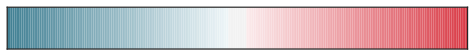

In [64]:

custom1=sns.choose_diverging_palette(as_cmap=True)


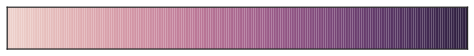

In [65]:
import seaborn as sns

custom2=sns.choose_cubehelix_palette(as_cmap=True)

{'peptide': 5, 'lipid': 1, 'sugar': 3, 'other': 2, 'aminoacid': 0, 'nucleobase': 4, 'carboxylicacid': 6}
('aminoacid', 'lipid', 'other', 'sugar', 'nucleobase', 'peptide', 'carboxylicacid')


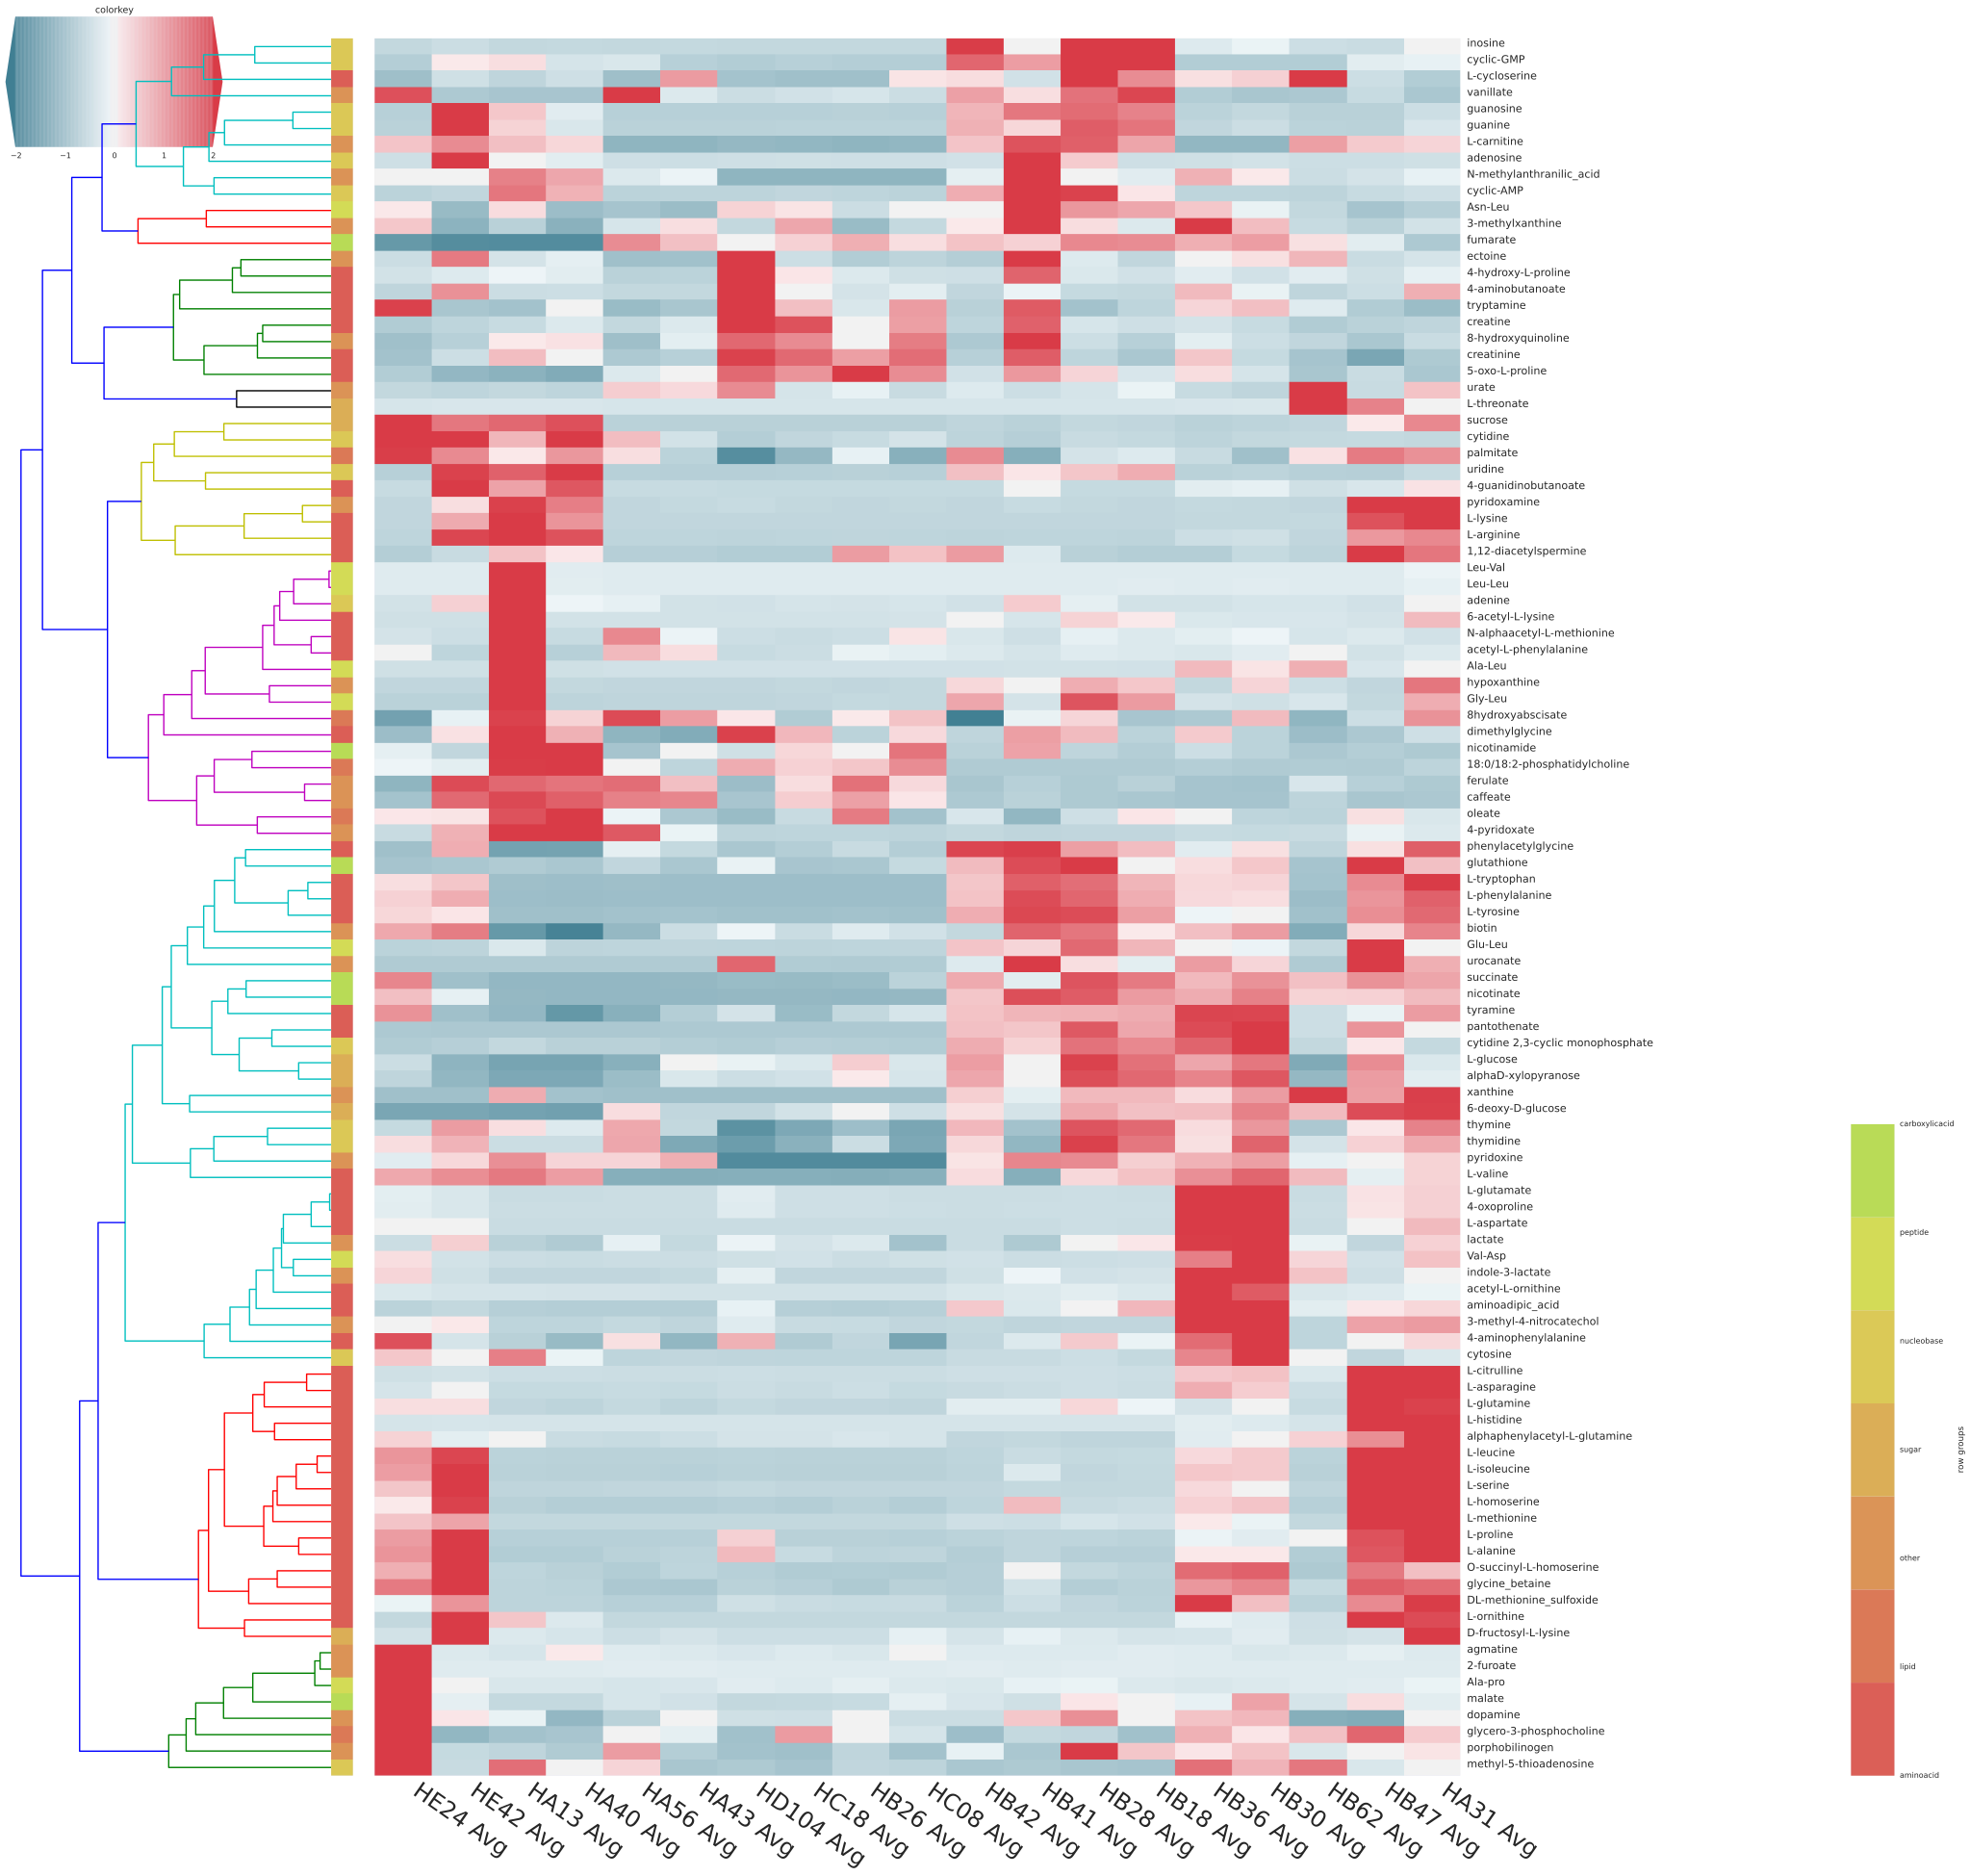

In [66]:
# import clustergram_heatmap_function as chf

s = np.sum(temp,axis=0)
s2 = np.sum(temp,axis=1)

idx = np.argwhere(s>0).flatten()

notBlanksIdx = [i for i,val in enumerate(colGroups) if val != 'Blank Extraction']

idx = [val for val in idx if val in notBlanksIdx]

rIdx = np.asarray([i for i, val in enumerate(rowGroups)])
#heatmap color options: choose either one of the mpl cmaps: 'redgreencmap','gnu','redbluecmap','hot','cmr'
#   or set custom colors above and enter 'custom1', or 'custom2'
temp = temp[:,idx]
temp = temp[rIdx,:]
clustergram(data = temp, standardize=2,
            colormap = 'custom1',
            row_linkage='average',
            row_pdist='correlation',
            row_labels = [rowLabels[i] for i in rIdx], 
            col_labels = [colLabels[i] for i in idx],
            row_groups = [rowGroups[i] for i in rIdx],
            unique_row_groups=row_grps, col_groups = None, 
            unique_col_groups=colGroups, display_range = (-2,2),
            figname = 'LS/20160830_LS_hopland_v1.pdf',
            figsize = 22, 
            log = False)
# clustergram (data = temp, standardize=3, 
#              col_pdist='correlation',
#              colormap = 'custom2',
#              row_linkage='average',
#              row_pdist='correlation',
#              row_labels = [rowLabels[i] for i in rIdx], 
#              col_labels = [colLabels[i] for i in idx],
#              row_groups = [rowGroups[i] for i in rIdx],
#              unique_row_groups=row_grps,
#              col_groups = [colGroups[i] for i in idx],
#              unique_col_groups=colGroups,
#              display_range = (0,1),
#              figname = '20160715_clustergram_correlation_rplos_metabolites_normalized_v1.pdf',
#              figsize = 22,
#              log = False)
